## Skin Cancer detection Model

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
from glob import glob

In [7]:
data_dir_train = pathlib.Path('./dataset/Train')
data_dir_test = pathlib.Path('./dataset/Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


#### Defining the parameters for the loader

In [8]:
img_height = 180
img_width = 180

#### 80% images used for training and 20% for validation

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset='training',
    seed=123, # seed means basically the random_state
    image_size=(img_height, img_width),
    batch_size=32
)

In [ ]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=32
)

In [12]:
class_names = train_dataset.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualizing the data

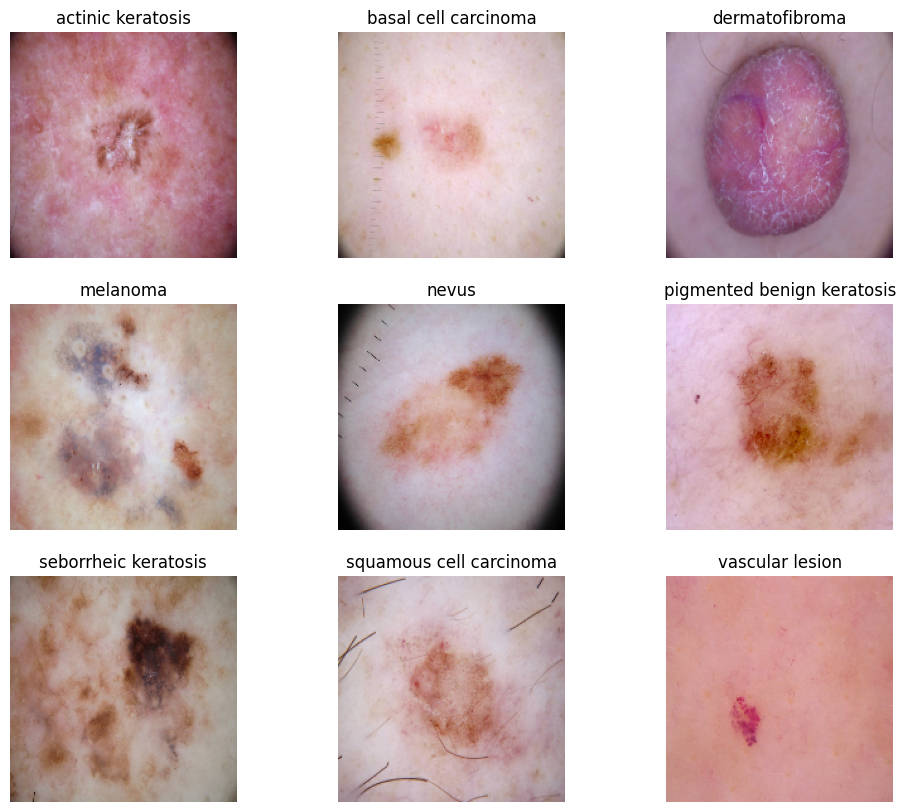

In [8]:
plt.figure(figsize=(12, 10))
for i in range(len(class_names)):
    filtered_dataset = train_dataset.filter(lambda x, l:tf.math.equal(l[0], i))
    for image, label in filtered_dataset.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8')) # converting the tensorflow tensor into a numpy array which is further converted into uint8 which is a datatype expected by matplotlib
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

### Creating the Model

In [9]:
num_classes = len(class_names)
model = tf.keras.models.Sequential(tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

#### Adding layers

- 'valid' padding: Reduces the spatial dimensions of the output feature map compared to the input. Typically used when you want to reduce the size of the feature map.

- 'same' padding: Maintains the spatial dimensions of the output feature map as the input. Useful when you want to preserve spatial information and produce an output of the same size as the input.

In [11]:
model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes))


#### Compiling the model

In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Training the model

In [14]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20)

Epoch 1/20


56/56 [==============================] - 23s 331ms/step - loss: 2.1439 - accuracy: 0.2115 - val_loss: 1.8919 - val_accuracy: 0.2416
Epoch 2/20
56/56 [==============================] - 20s 358ms/step - loss: 1.7857 - accuracy: 0.3488 - val_loss: 1.7179 - val_accuracy: 0.3602
Epoch 3/20
56/56 [==============================] - 21s 366ms/step - loss: 1.4914 - accuracy: 0.4810 - val_loss: 1.7200 - val_accuracy: 0.4541
Epoch 4/20
56/56 [==============================] - 21s 368ms/step - loss: 1.4476 - accuracy: 0.4927 - val_loss: 1.3920 - val_accuracy: 0.5190
Epoch 5/20
56/56 [==============================] - 21s 374ms/step - loss: 1.2466 - accuracy: 0.5631 - val_loss: 1.3836 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 21s 382ms/step - loss: 1.2015 - accuracy: 0.5921 - val_loss: 1.3648 - val_accuracy: 0.5481
Epoch 7/20
56/56 [==============================] - 22s 391ms/step - loss: 1.0970 - accuracy: 0.6099 - val_loss: 1.3452 - val_accuracy: 0.5280
Epoch 8/20

### Visualizing the training results

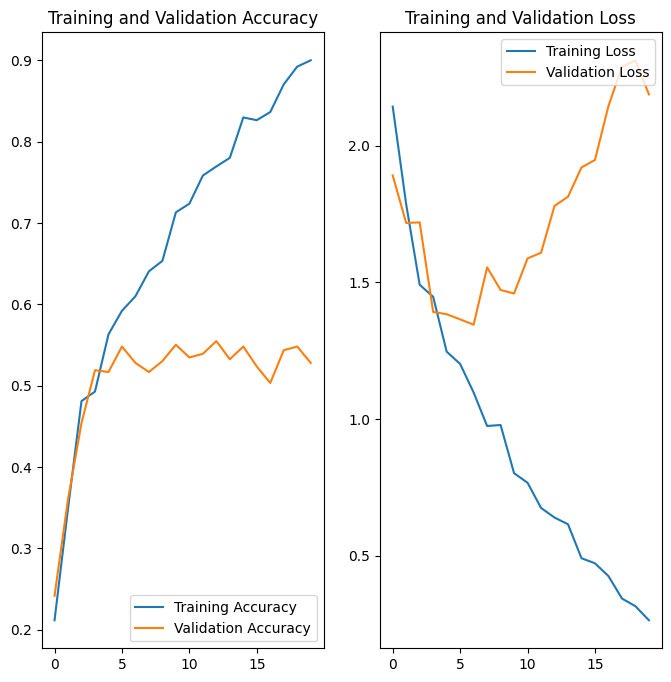

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- From the above visualization, we can see that there is a major difference in the training and the calidation accuracy and alsp between the training and the validation loss.
- This indicates that the model has been overfitted and therefore we need to perform data augmentation to handle this issue.

### Data Augmentation and Dropout

In [8]:
data_augmentation = tf.keras.Sequential(
    [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

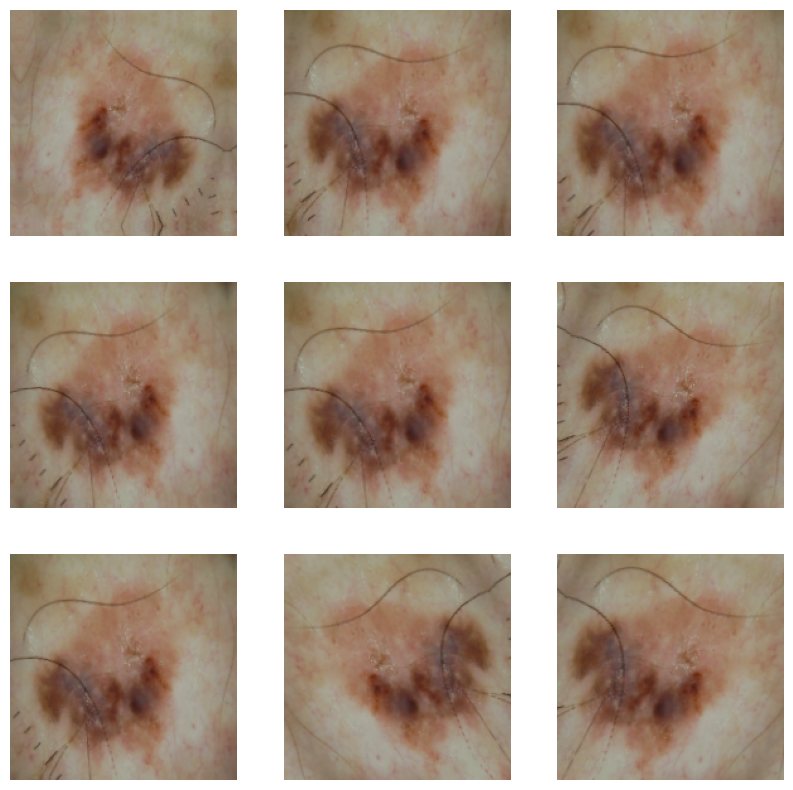

In [26]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range (9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

### Recreating the model, compiling and training it

In [18]:
num_classes = len(class_names)
model = tf.keras.models.Sequential([data_augmentation, tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))])

model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=15)

Epoch 1/15


56/56 [==============================] - 23s 379ms/step - loss: 2.0715 - accuracy: 0.2199 - val_loss: 1.8904 - val_accuracy: 0.3020
Epoch 2/15
56/56 [==============================] - 22s 400ms/step - loss: 1.8433 - accuracy: 0.3153 - val_loss: 1.7555 - val_accuracy: 0.3848
Epoch 3/15
56/56 [==============================] - 22s 394ms/step - loss: 1.7207 - accuracy: 0.3756 - val_loss: 1.5645 - val_accuracy: 0.4631
Epoch 4/15
56/56 [==============================] - 22s 396ms/step - loss: 1.5429 - accuracy: 0.4537 - val_loss: 1.4637 - val_accuracy: 0.5078
Epoch 5/15
56/56 [==============================] - 22s 391ms/step - loss: 1.4590 - accuracy: 0.4693 - val_loss: 1.4663 - val_accuracy: 0.4855
Epoch 6/15
56/56 [==============================] - 24s 421ms/step - loss: 1.3989 - accuracy: 0.5033 - val_loss: 1.3264 - val_accuracy: 0.5503
Epoch 7/15
56/56 [==============================] - 23s 403ms/step - loss: 1.3296 - accuracy: 0.5195 - val_loss: 1.4945 - val_accuracy: 0.4765
Epoch 8/15

### Visualizing the newly trained model

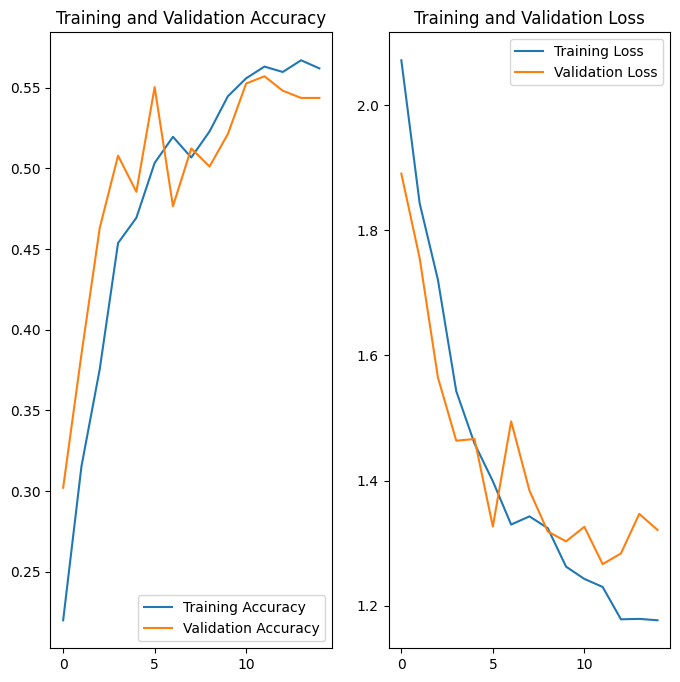

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Further increasing the accuracy of the model

- To increase the accuracy of the model, we make the data distribution among all classes even.

In [28]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_original = dict(zip(path_list, lesion_list))
df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
df

,Path,Label
0,dataset\Train\actinic keratosis\ISIC_0025780.jpg,actinic keratosis
1,dataset\Train\actinic keratosis\ISIC_0025803.jpg,actinic keratosis
2,dataset\Train\actinic keratosis\ISIC_0025825.jpg,actinic keratosis
3,dataset\Train\actinic keratosis\ISIC_0025953.jpg,actinic keratosis
4,dataset\Train\actinic keratosis\ISIC_0025957.jpg,actinic keratosis
...,...,...
2234,dataset\Train\vascular lesion\ISIC_0033844.jpg,vascular lesion
2235,dataset\Train\vascular lesion\ISIC_0033969.jpg,vascular lesion
2236,dataset\Train\vascular lesion\ISIC_0033991.jpg,vascular lesion
2237,dataset\Train\vascular lesion\ISIC_0034196.jpg,vascular lesion


Class=0, n=114, (5.092%)
Class=1, n=376, (16.793%)
Class=2, n=95, (4.243%)
Class=3, n=438, (19.562%)
Class=4, n=357, (15.945%)
Class=5, n=462, (20.634%)
Class=6, n=77, (3.439%)
Class=7, n=181, (8.084%)
Class=8, n=139, (6.208%)


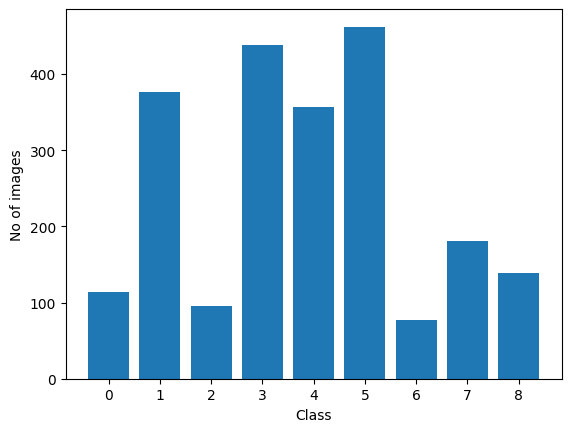

In [29]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter # counts the number of unique classes

X, y = df['Path'], df['Label']
y = LabelEncoder().fit_transform(y)
counter = Counter(y)

for k, v in counter.items():
    per = v/len(y) * 100
    print('Class=%d, n=%d, (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.xticks([i for i in range(9)])
plt.xlabel('Class')
plt.ylabel('No of images')
plt.show()

- From the above we can clearly see that the data distribution is highly uneven among all the classes.

### Rectifying this imbalance

In [ ]:
!pip install Augmentor

In [53]:
path_to_training_set = './dataset/Train'
import Augmentor

for i in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_set, i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to ./dataset/Train\actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1E7142D7C10>: 100%|██████████| 500/500 [00:03<00:00, 140.73 Samples/s]


Initialised with 376 image(s) found.
Output directory set to ./dataset/Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E7280E07D0>: 100%|██████████| 500/500 [00:03<00:00, 141.56 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to ./dataset/Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E761DA9710>: 100%|██████████| 500/500 [00:03<00:00, 140.28 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to ./dataset/Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x1E720F0A490>: 100%|██████████| 500/500 [00:22<00:00, 22.24 Samples/s]                    


Initialised with 357 image(s) found.
Output directory set to ./dataset/Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=962x722 at 0x1E703C09CD0>: 100%|██████████| 500/500 [00:18<00:00, 26.35 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to ./dataset/Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E75E61BA10>: 100%|██████████| 500/500 [00:04<00:00, 109.74 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to ./dataset/Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1E72ED67550>: 100%|██████████| 500/500 [00:09<00:00, 50.01 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to ./dataset/Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E72F5C2410>: 100%|██████████| 500/500 [00:04<00:00, 118.37 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to ./dataset/Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E75FB916D0>: 100%|██████████| 500/500 [00:04<00:00, 116.61 Samples/s]                  


We have added 500 images per class now.

### Retraining the model on the new dataset

In [9]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(180, 180),
    batch_size=64
)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


In [10]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(180, 180),
    batch_size=64
)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


In [22]:
num_classes = len(class_names)
model = tf.keras.models.Sequential([data_augmentation, tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))])

In [23]:
model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes))

In [24]:
new_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [27]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [29]:
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=30
)

Epoch 1/30
57/57 [==============================] - 51s 863ms/step - loss: 1.6701 - accuracy: 0.3947 - val_loss: 1.4625 - val_accuracy: 0.4278
Epoch 2/30
57/57 [==============================] - 57s 986ms/step - loss: 1.3801 - accuracy: 0.4833 - val_loss: 1.4345 - val_accuracy: 0.4533
Epoch 3/30
57/57 [==============================] - 48s 839ms/step - loss: 1.3536 - accuracy: 0.4972 - val_loss: 1.3863 - val_accuracy: 0.4856
Epoch 4/30
57/57 [==============================] - 46s 803ms/step - loss: 1.2900 - accuracy: 0.5300 - val_loss: 1.2859 - val_accuracy: 0.4989
Epoch 5/30
57/57 [==============================] - 47s 806ms/step - loss: 1.2436 - accuracy: 0.5292 - val_loss: 1.2220 - val_accuracy: 0.5278
Epoch 6/30
57/57 [==============================] - 47s 806ms/step - loss: 1.2198 - accuracy: 0.5478 - val_loss: 1.3064 - val_accuracy: 0.5056
Epoch 7/30
57/57 [==============================] - 47s 811ms/step - loss: 1.1449 - accuracy: 0.5686 - val_loss: 1.1051 - val_accuracy: 0.5878

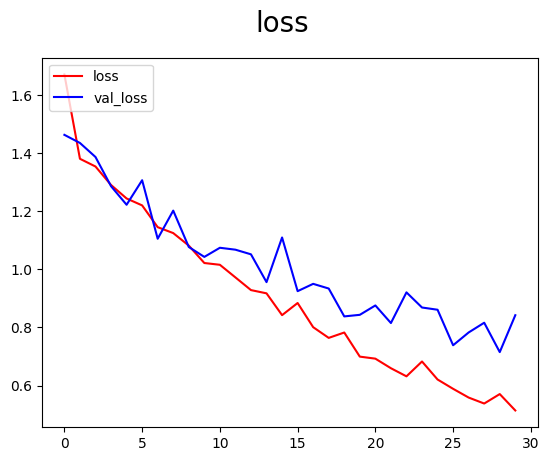

In [30]:
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [31]:
model.save('Skin_Cancer_Detection')

INFO:tensorflow:Assets written to: Skin_Cancer_Detection\assets


INFO:tensorflow:Assets written to: Skin_Cancer_Detection\assets


In [4]:
loaded_model = tf.keras.models.load_model('Skin_Cancer_Detection')

### Model Test

In [16]:
from tensorflow.keras.preprocessing import image

image_paths_AK = [
                'testing/actinic_keratosis/1.jpg', 
                'testing/actinic_keratosis/2.jpg', 
                'testing/actinic_keratosis/3.jpg', 
                'testing/actinic_keratosis/4.jpg', 
                'testing/actinic_keratosis/5.jpg', 
                'testing/actinic_keratosis/6.jpg'
            ]

output_AK = []

for img_path in image_paths_AK:
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = loaded_model.predict(img_array)

    predicted_class_index = np.argmax(prediction)
    output_AK.append(class_names[predicted_class_index])

1/1 [==============================] - 0s 24ms/step


In [17]:
print('Actinic Keratosis results - ')
output_AK

Actinic Keratosis results - 


['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'squamous cell carcinoma',
 'actinic keratosis',
 'squamous cell carcinoma']

In [19]:
image_paths_BaselCellCar = [
                './testing/basal_cell_carcinoma/1.jpg',
                './testing/basal_cell_carcinoma/2.jpg',
                './testing/basal_cell_carcinoma/3.jpg',
                './testing/basal_cell_carcinoma/4.jpg',
                './testing/basal_cell_carcinoma/5.jpg'
            ]

output_BCC = []

for img_path in image_paths_BaselCellCar:
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = loaded_model.predict(img_array)

    predicted_class_index = np.argmax(prediction)
    output_BCC.append(class_names[predicted_class_index])

1/1 [==============================] - 0s 24ms/step


In [20]:
print('Basel Cellar Carcinoma')
output_BCC

Basel Cellar Carcinoma


['basal cell carcinoma',
 'basal cell carcinoma',
 'squamous cell carcinoma',
 'basal cell carcinoma',
 'actinic keratosis']

In [46]:
image_paths_dermatofibrona = [
                './testing/dermatofibroma/1.jpg',
                './testing/dermatofibroma/2.jpg',
                './testing/dermatofibroma/3.jpg',         
                './testing/dermatofibroma/4.jpg',         
                './testing/dermatofibroma/5.jpg',         
                './testing/dermatofibroma/6.jpg',         
            ]

output_dermatofibrona = []

for img_path in image_paths_dermatofibrona:
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = loaded_model.predict(img_array)

    predicted_class_index = np.argmax(prediction)
    output_dermatofibrona.append(class_names[predicted_class_index])

1/1 [==============================] - 0s 31ms/step


In [47]:
print('Dermatofibrona')
output_dermatofibrona

Dermatofibrona


['dermatofibroma',
 'dermatofibroma',
 'pigmented benign keratosis',
 'dermatofibroma',
 'dermatofibroma',
 'seborrheic keratosis']

In [52]:
image_paths_4 = [
                './testing/melanoma/1.jpg',         
                './testing/melanoma/2.jpg',         
                './testing/melanoma/3.jpg',         
                './testing/melanoma/4.jpg',         
                './testing/melanoma/5.jpg',         
                './testing/melanoma/6.jpg',         
            ]

output_4 = []

for img_path in image_paths_4:
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = loaded_model.predict(img_array)

    predicted_class_index = np.argmax(prediction)
    output_4.append(class_names[predicted_class_index])

1/1 [==============================] - 0s 24ms/step


In [53]:
print('Melanoma')
output_4

Melanoma


['melanoma',
 'actinic keratosis',
 'melanoma',
 'actinic keratosis',
 'vascular lesion',
 'pigmented benign keratosis']

In [55]:
image_paths_5 = [
                './testing/nevus/1.jpg',         
                './testing/nevus/2.jpg',         
                './testing/nevus/3.jpg',         
                './testing/nevus/4.jpg',         
                './testing/nevus/5.jpg',         
                './testing/nevus/6.jpg',         
            ]

output_5 = []

for img_path in image_paths_5:
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = loaded_model.predict(img_array)

    predicted_class_index = np.argmax(prediction)
    output_5.append(class_names[predicted_class_index])

1/1 [==============================] - 0s 23ms/step


In [56]:
print('Nevus')
output_5

Nevus


['nevus',
 'nevus',
 'seborrheic keratosis',
 'nevus',
 'seborrheic keratosis',
 'nevus']

In [58]:
image_paths_6 = [
                './testing/pigmented_benign_keratosis/1.jpg',         
                './testing/pigmented_benign_keratosis/2.jpg',         
                './testing/pigmented_benign_keratosis/3.jpg',         
                './testing/pigmented_benign_keratosis/4.jpg',         
                './testing/pigmented_benign_keratosis/5.jpg'         
            ]

output_6 = []

for img_path in image_paths_6:
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = loaded_model.predict(img_array)

    predicted_class_index = np.argmax(prediction)
    output_6.append(class_names[predicted_class_index])

1/1 [==============================] - 0s 22ms/step


In [59]:
print('Pigmented Benign Keratosis')
output_6

Pigmented Benign Keratosis


['pigmented benign keratosis',
 'pigmented benign keratosis',
 'actinic keratosis',
 'pigmented benign keratosis',
 'nevus']

In [61]:
image_paths_7 = [
                './testing/seborrheic_keratosis/1.jpg',         
                './testing/seborrheic_keratosis/2.jpg',         
                './testing/seborrheic_keratosis/3.jpg',         
                './testing/seborrheic_keratosis/4.jpg',         
                './testing/seborrheic_keratosis/5.jpg'         
            ]

output_7 = []

for img_path in image_paths_7:
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = loaded_model.predict(img_array)

    predicted_class_index = np.argmax(prediction)
    output_7.append(class_names[predicted_class_index])

print('\nSeborrheic Keratosis')
output_7

1/1 [==============================] - 0s 22ms/step

Seborrheic Keratosis


['seborrheic keratosis',
 'seborrheic keratosis',
 'vascular lesion',
 'squamous cell carcinoma',
 'nevus']